In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import io
import requests
%matplotlib inline

   Dataset-1  

In [68]:
admin = pd.read_csv('https://raw.githubusercontent.com/samadshaik005/datasets/master/datasets_14872_228180_Admission_Predict.csv' ,error_bad_lines=False)

In [69]:
admin

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65
...,...,...,...,...,...,...,...,...,...
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67


In [70]:
admin.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [71]:
admin.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
395,396,324,110,3,3.5,3.5,9.04,1,0.82
396,397,325,107,3,3.0,3.5,9.11,1,0.84
397,398,330,116,4,5.0,4.5,9.45,1,0.91
398,399,312,103,3,3.5,4.0,8.78,0,0.67
399,400,333,117,4,5.0,4.0,9.66,1,0.95


In [72]:
print("no of columns in the table : "+str(len(admin.index)))

no of columns in the table : 400


In [73]:
dataset=admin.iloc[:,1:9]
dataset.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [74]:
print(dataset.shape)
dataset.describe()

(400, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [75]:
dataset.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Here no null values identified ..

In [76]:
value=dataset.corr()
value['Chance of Admit '].sort_values(ascending=False)

Chance of Admit      1.000000
CGPA                 0.873289
GRE Score            0.802610
TOEFL Score          0.791594
University Rating    0.711250
SOP                  0.675732
LOR                  0.669889
Research             0.553202
Name: Chance of Admit , dtype: float64

here chance of admit is target variable the highest related value is CGPA

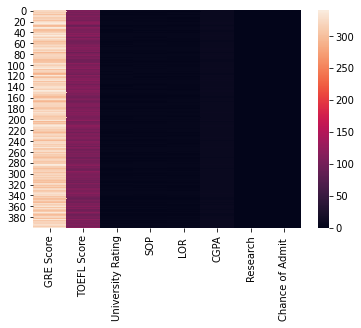

In [77]:
sns.heatmap(dataset)

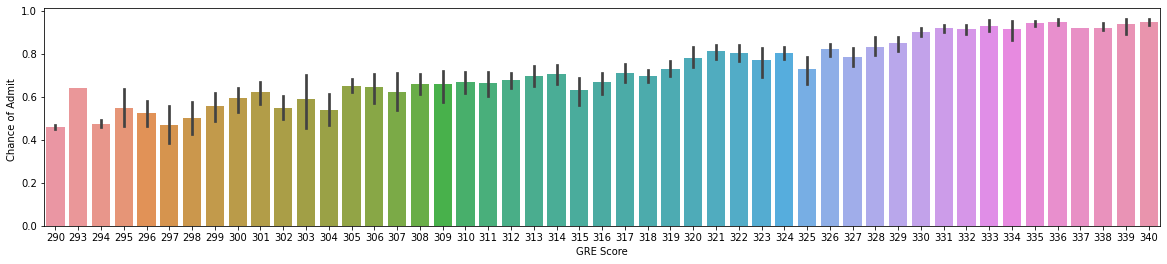

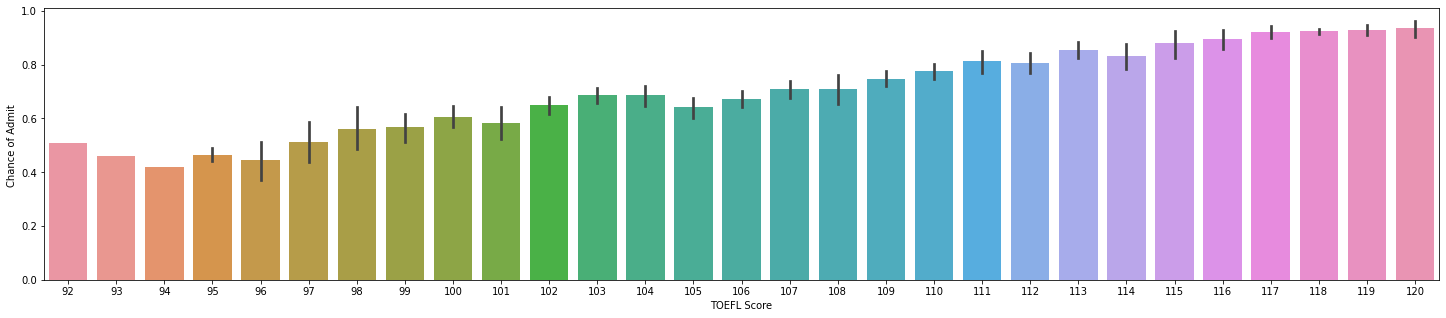

In [78]:
plt.subplots(figsize=(20,4))
sns.barplot(x="GRE Score",y="Chance of Admit ",data=dataset)
plt.subplots(figsize=(25,5))
sns.barplot(x="TOEFL Score",y="Chance of Admit ",data=dataset)


In this bar plot we have observed that as the GRE score is more chance of admit is high. As the TOEFL score is high the chance of admit is also high. 

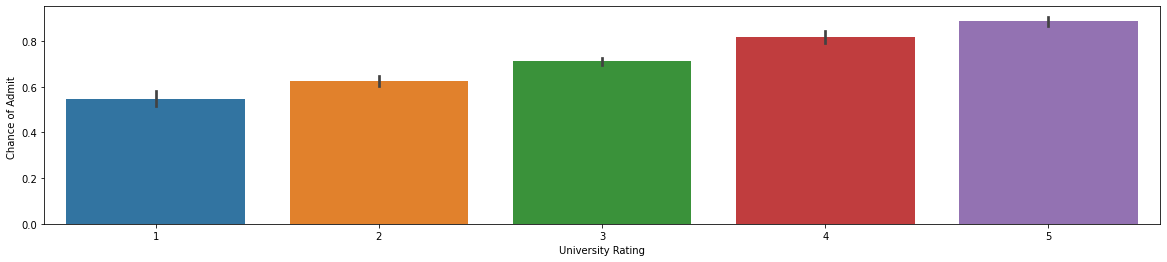

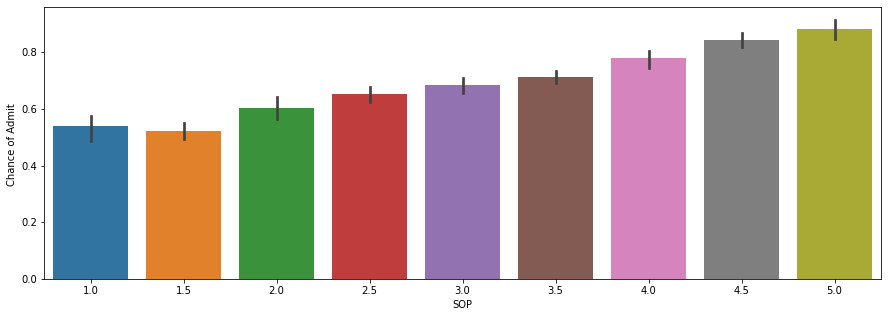

In [79]:
plt.subplots(figsize=(20,4))
sns.barplot(x="University Rating",y="Chance of Admit ",data=dataset)
plt.subplots(figsize=(15,5))
sns.barplot(x="SOP",y="Chance of Admit ",data=dataset)

As the university rating is high the chance of admit is also high.
As the SOP value is high the chance of admit is also high. 

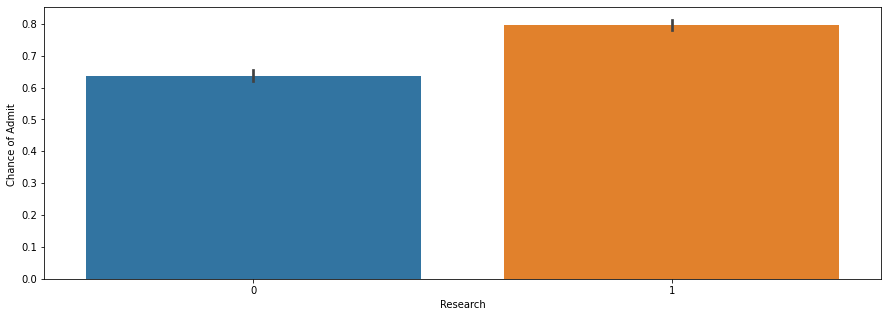

In [80]:

plt.subplots(figsize=(15,5))
sns.barplot(x="Research",y="Chance of Admit ",data=dataset)

As the research value is high then chance of admit is also high.

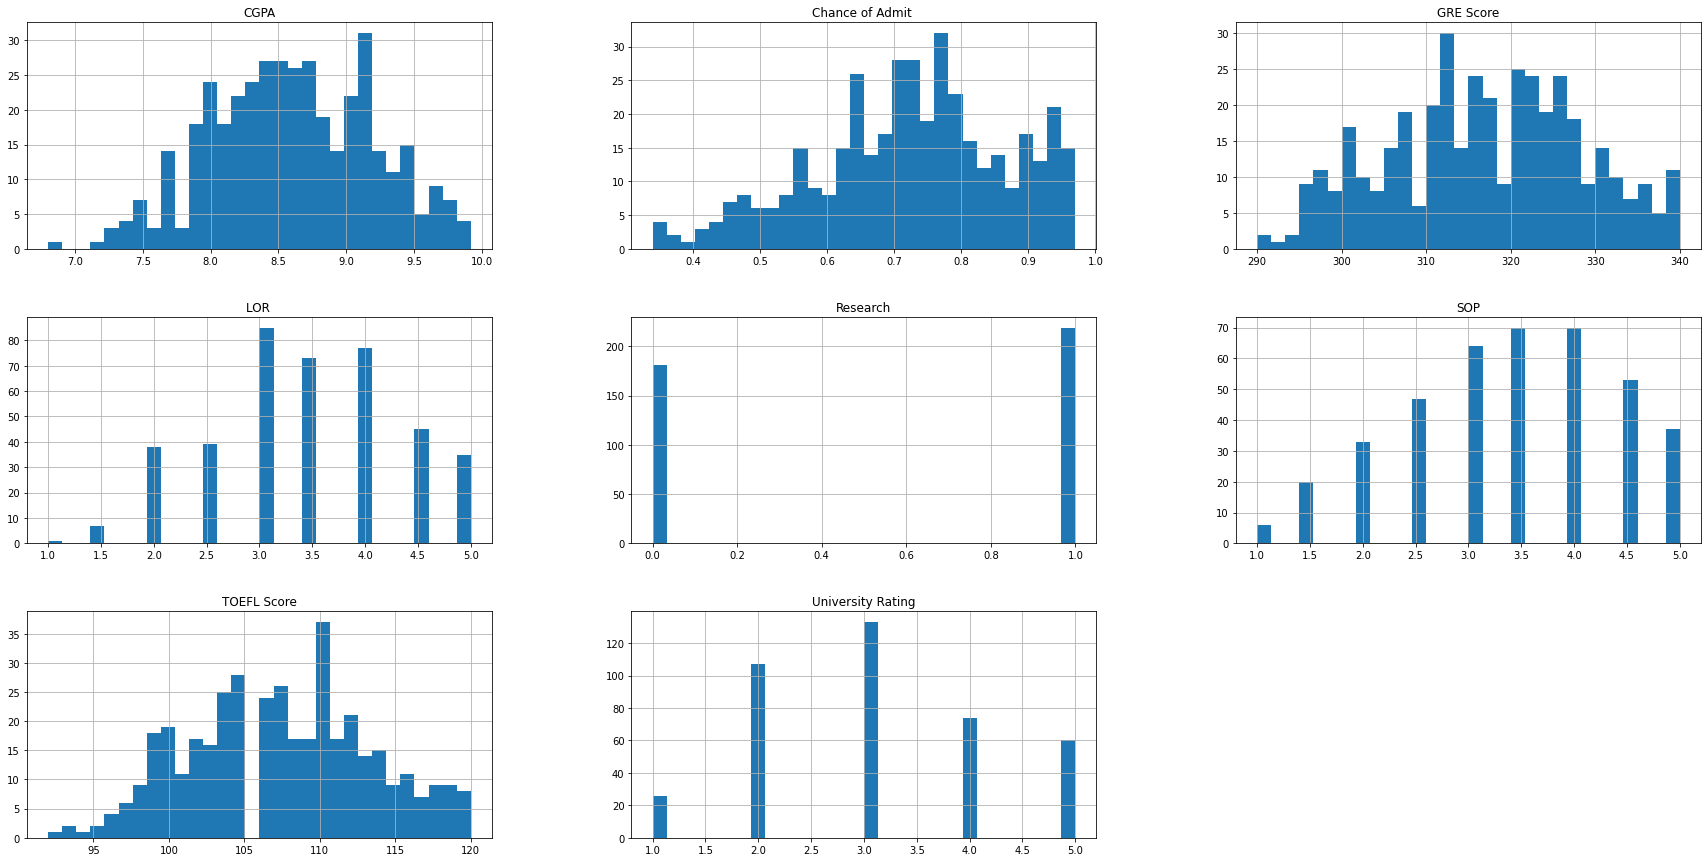

In [81]:
dataset.hist(bins=30, figsize=(30,15))
plt.show()

As the coloum attributes i.e; other than target variable is increases the target variable i.e; Chance of Admit also increases.

In [82]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          400 non-null    int64  
 1   TOEFL Score        400 non-null    int64  
 2   University Rating  400 non-null    int64  
 3   SOP                400 non-null    float64
 4   LOR                400 non-null    float64
 5   CGPA               400 non-null    float64
 6   Research           400 non-null    int64  
 7   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 25.1 KB


In [83]:
X = dataset.drop(['Chance of Admit '], axis = 1)
y=dataset["Chance of Admit "]

In [84]:
print(X.shape)
print(y.shape)
X.head()


(400, 7)
(400,)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [85]:
y.head()


0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit , dtype: float64

Splitting the data

In [86]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)
X = X.astype('float')
y = y.astype('float')

In [87]:
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (320, 7) (320,)
Test set: (80, 7) (80,)


modelling the data

```
# This is formatted as code
```



In [88]:
from sklearn.linear_model import LinearRegression

In [89]:
Linear=LinearRegression()
Linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

prediction of model i.e; Linear Regression


In [90]:
y_pred=Linear.predict(X_test)
y_pred

array([0.7226944 , 0.69413229, 0.78864499, 0.78216045, 0.85343383,
       0.64491036, 0.63638313, 0.55607164, 0.49601148, 0.93154092,
       0.81489263, 0.93486376, 0.88212268, 0.64871558, 0.72652977,
       0.68591465, 0.81796893, 0.86744325, 0.50758006, 0.6920451 ,
       0.667625  , 0.78064666, 0.83421581, 0.91967463, 0.65430912,
       0.56652414, 0.7241488 , 0.70847631, 0.90514058, 0.65497936,
       0.94911478, 0.63848498, 0.79257757, 0.78496168, 0.71720411,
       0.65418614, 0.43262218, 0.65210164, 0.90479229, 0.76249685,
       0.84265544, 0.68014996, 0.88404992, 0.64896391, 0.97727002,
       0.7111686 , 0.73740191, 0.82754289, 0.63802488, 0.6669232 ,
       0.78417803, 0.56425656, 0.80796338, 0.73154013, 0.70870657,
       0.89037172, 0.47935505, 0.52449211, 0.78599642, 0.78868035,
       0.92965198, 0.73217127, 0.87659205, 0.72122612, 0.53196654,
       0.77603428, 0.85923897, 0.75137956, 0.65711657, 0.79869589,
       0.81106646, 0.57971478, 0.70359047, 0.63237323, 0.83828

In [91]:
values =pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
values


,Actual,Predicted
398,0.67,0.722694
125,0.64,0.694132
328,0.80,0.788645
339,0.81,0.782160
172,0.86,0.853434
...,...,...
347,0.42,0.441130
41,0.49,0.659061
180,0.71,0.614480
132,0.71,0.704706


Accuracy calculation:

In [92]:
accuracy = Linear.score(X_test,y_test)
print(accuracy*100,'%')
print(Linear.intercept_) 
print(Linear.coef_)

80.79043677020101 %
-1.1772232142223102
[ 0.00151123  0.00314554  0.00824371 -0.00564734  0.02172334  0.11532606
  0.02610078]


In [93]:
from sklearn.metrics import mean_absolute_error,r2_score , mean_squared_error 


In [94]:
print("R2 score of the model is ",r2_score(y_pred,y_test))
print("mean_absolute_error  of the model is ",mean_absolute_error(y_pred,y_test))

R2 score of the model is  0.713994345298069
mean_absolute_error  of the model is  0.04495779899577681


In [95]:
import joblib

In [96]:
joblib_file='linear_Regression.pkl'
joblib.dump(Linear,joblib_file)

['linear_Regression.pkl']

In [97]:
joblib_Linear_model=joblib.load(joblib_file)
joblib_Linear_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

DATASET 2


In [98]:
quality =pd.read_csv('https://raw.githubusercontent.com/samadshaik005/datasets/master/datasets_4458_8204_winequality-red.csv')

In [99]:
quality

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,NaN,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,NaN,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,NaN,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [100]:
quality.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,NaN,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


In [101]:
quality.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,NaN,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,NaN,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6.0


In [102]:
quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1594 non-null   float64
 2   citric acid           1595 non-null   float64
 3   residual sugar        1598 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1595 non-null   float64
 6   total sulfur dioxide  1597 non-null   float64
 7   density               1592 non-null   float64
 8   pH                    1595 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1594 non-null   float64
 11  quality               1597 non-null   float64
dtypes: float64(12)
memory usage: 150.0 KB


In [103]:
quality.shape

(1599, 12)

In [104]:
quality.isna().sum()

fixed acidity           3
volatile acidity        5
citric acid             4
residual sugar          1
chlorides               3
free sulfur dioxide     4
total sulfur dioxide    2
density                 7
pH                      4
sulphates               0
alcohol                 5
quality                 2
dtype: int64

Removing the null values and filling the null values with zeros. As the NAN values are less in the all rows.

In [105]:
quality.fillna(0,inplace=True)
quality.astype(float)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.00000,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.000,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.00,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [106]:
quality.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [107]:
quality['quality'].unique()

array([5., 6., 7., 4., 8., 3., 0.])

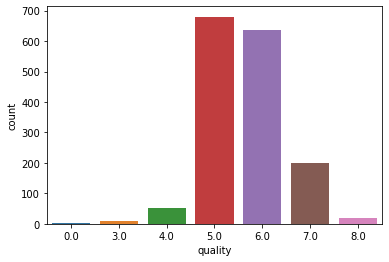

In [108]:
sns.countplot(x='quality', data=quality)

As the from the above countplot the quality plot 5.0 ,6.0 values been repeated more times than other values.So, here the quality is max with 5.0,6.0 values. 

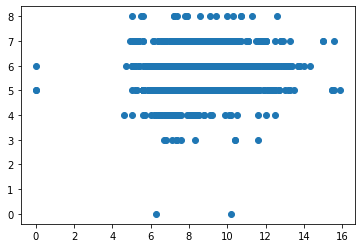

In [109]:
A=quality['fixed acidity']
B=quality['quality']
plt.scatter(A,B)
plt.show()

As the plot between fixed acidity and quality i.e; target variable.that tells about fixed acidity values are brodaly starts from 3 and above .they are ploted as follows.

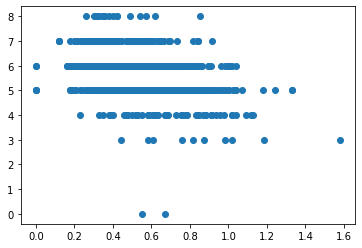

In [110]:
C=quality['volatile acidity']
plt.scatter(C,B)

And this plot tells that volatile acidity is high for the quality values from 3 onwards.

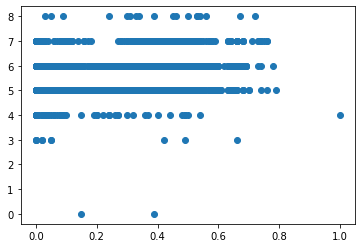

In [111]:
D=quality['citric acid']
plt.scatter(D,B)

As the citric values are being increased they are appeared in quality values above 3.

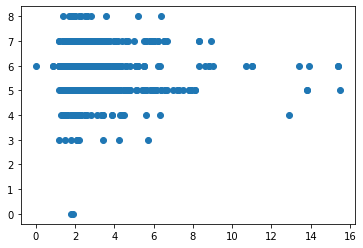

In [112]:
E=quality['residual sugar']
plt.scatter(E,B)

As the residual sugar values are in the range of 2-9 of above 3 values of quality.

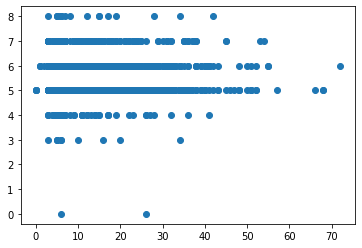

In [113]:
F=quality['free sulfur dioxide']
plt.scatter(F,B)

As the free sulfur dioxide increases then quality also increases.but the quality is more observed in 4-7 range.

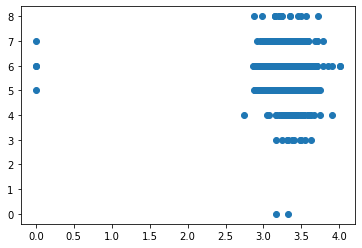

In [114]:
G=quality['pH']
plt.scatter(G,B)

for increase in the quality the pH values lies between 3.0-4.0

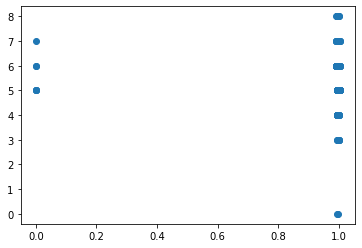

In [115]:
H=quality['density']
plt.scatter(H,B)

here the density values are in 0 or 1
mostly the density is 1 for quality 3 and above.

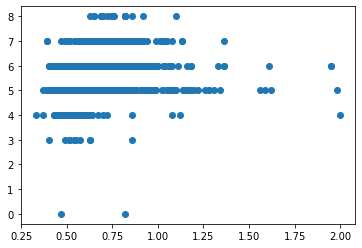

In [116]:
I=quality['sulphates']
plt.scatter(I,B)

As the sulphates values are increasing for quality values increasing accordinly.

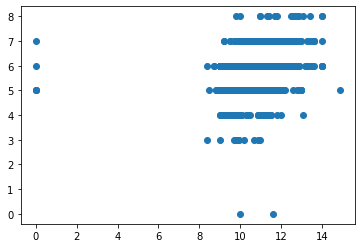

In [117]:
J=quality['alcohol']
plt.scatter(J,B)

here the alcohol percentage is quite high for values 8-13 for the quality values from 3 and above.

implementing model

In [118]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression



spilliting the data

In [119]:
X = quality.drop(['quality'], axis = 1)       
y = quality.quality
X = X.astype('int')
y = y.astype('int')
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=7)

In [120]:
print("Train set:", X_train.shape, y_train.shape)
print("Test set:", X_test.shape, y_test.shape)

Train set: (1279, 11) (1279,)
Test set: (320, 11) (320,)


Logistic Regression

In [121]:
logistic= LogisticRegression(C=0.01,solver='liblinear')
logistic.fit(X_train,y_train)
pred_l=logistic.predict(X_test)

Prediction

In [122]:
pred_l


array([6, 6, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 5, 5, 5, 5, 6, 6, 6, 5,
       5, 6, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6, 6, 6,
       6, 6, 5, 6, 6, 6, 5, 5, 6, 6, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5, 5, 5,
       6, 6, 5, 6, 6, 5, 6, 6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 5, 6, 6,
       6, 6, 6, 6, 6, 5, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5,
       5, 5, 6, 6, 5, 5, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5, 6, 5,
       5, 5, 6, 6, 5, 5, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 6, 5, 5, 5, 6,
       5, 5, 6, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 6, 5, 5, 6, 5, 6, 5, 5,
       6, 6, 6, 6, 6, 6, 6, 6, 5, 6, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 6, 6,
       6, 6, 5, 5, 5, 6, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 6, 6, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 6, 5, 6, 6, 6, 5, 5, 6,
       6, 5, 6, 6, 5, 5, 6, 6, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 6, 5, 6, 6,
       5, 5, 5, 6, 6, 6, 6, 5, 6, 5, 5, 5, 5, 5, 6, 6, 5, 6, 5, 6, 6, 6,
       6, 5, 6, 6, 5, 6, 5, 6, 5, 5, 5, 5, 5, 6, 5,

In [123]:
from sklearn.metrics import accuracy_score

Accuracy Calculation

In [124]:
accuracy_score(y_test,pred_l) *100

51.24999999999999

In [125]:
joblib_file='Logisticregression.pkl'
joblib.dump(logistic,joblib_file)

['Logisticregression.pkl']

In [126]:
joblib_logistic=joblib.load(joblib_file)
joblib_logistic

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

DecisionTree Classification

In [127]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [128]:
decision = DecisionTreeClassifier(criterion='entropy',max_depth=6)
decision.fit(X_train,y_train)
pred_d = decision.predict(X_test)

Prediction Calculation

In [129]:
pred_d

array([5, 5, 6, 6, 7, 5, 6, 7, 5, 5, 6, 6, 6, 5, 5, 5, 7, 5, 4, 6, 7, 5,
       5, 6, 5, 7, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 7, 5, 6, 5, 6, 6, 7, 6,
       6, 6, 7, 7, 7, 6, 7, 5, 7, 7, 7, 7, 6, 6, 5, 7, 5, 6, 6, 5, 5, 5,
       6, 6, 6, 7, 6, 6, 7, 7, 5, 6, 6, 6, 5, 6, 6, 6, 5, 5, 5, 6, 6, 5,
       5, 5, 6, 6, 6, 5, 5, 7, 7, 5, 6, 7, 5, 6, 5, 5, 5, 6, 6, 6, 6, 5,
       6, 5, 6, 6, 5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 7, 7, 5, 6, 7, 5, 6, 5,
       6, 5, 7, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 5, 5, 5, 6, 5, 5, 5, 7,
       6, 5, 5, 5, 5, 7, 5, 6, 7, 6, 6, 5, 5, 5, 7, 5, 5, 5, 5, 6, 6, 6,
       5, 5, 6, 6, 6, 6, 7, 6, 5, 6, 7, 5, 5, 6, 5, 7, 5, 5, 5, 5, 5, 7,
       6, 6, 5, 6, 5, 5, 6, 7, 6, 6, 6, 6, 5, 6, 5, 5, 6, 5, 5, 7, 5, 6,
       5, 6, 5, 6, 6, 6, 6, 7, 5, 6, 5, 6, 6, 6, 5, 5, 5, 7, 5, 5, 5, 5,
       5, 5, 6, 6, 3, 5, 5, 7, 6, 6, 6, 6, 7, 6, 5, 6, 6, 5, 6, 5, 7, 6,
       5, 5, 5, 4, 5, 6, 6, 6, 7, 6, 6, 5, 0, 5, 7, 6, 6, 6, 0, 6, 6, 6,
       7, 5, 7, 6, 5, 6, 6, 6, 5, 6, 5, 5, 5, 6, 5,

Accuracy Calculation

In [130]:
accuracy_score(y_test,pred_l) * 100

51.24999999999999

In [131]:
joblib_file='Decison.pkl'
joblib.dump(decision,joblib_file)

['Decison.pkl']

In [132]:
joblib_Decison=joblib.load(joblib_file)
joblib_Decison

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')